# 1. Setup and Load Data

## 1.1 Install Dependencies

In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bi

In [3]:
import tensorflow as tf
import os

In [4]:
#Avoid OOM Errors by setting GPU Memory Consumption Growth

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.2 Remove Dodgy Images

In [5]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [6]:
data_dir = 'Data'

In [7]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [8]:
os.listdir(data_dir)

['cats', 'dogs']

In [9]:
img = cv2.imread(os.path.join('Data', 'cats', 'C467I24CPAONX27SFIT3ICMAMY.jpg'))

In [10]:
type(img)

numpy.ndarray

In [11]:
img.shape

(2601, 3827, 3)

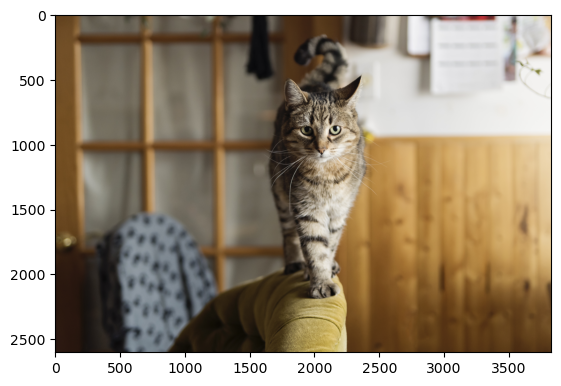

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list Data\cats\5a0420c80195a039a74309d2b710cf33.jpg
Image not in ext list Data\cats\black-cat-back.jpg
Image not in ext list Data\cats\cats-breeds-Maine-Coon-Himalayan.jpg
Image not in ext list Data\cats\Himalayan-chocolate-point.jpg
Image not in ext list Data\cats\p07ryyyj.jpg
Image not in ext list Data\cats\skynews-cat-mental-health-animals_5943005.jpg
Image not in ext list Data\cats\tapetum-lucidum-light-retina-night-vision-vertebrates.jpg
Image not in ext list Data\cats\why-do-cats-like-fish.jpg
Image not in ext list Data\dogs\1200px-Labrador_on_Quantock_28217526218429.jpg
Image not in ext list Data\dogs\2022-05-06_10_Easy_Pieces_to_Liven_Up_Your_Dog-s_Dinner_AdobeStock_328836752.jpg
Image not in ext list Data\dogs\800px-French_Bulldog_with_puppies.jpg
Image not in ext list Data\dogs\beagle-hound-dog.jpg
Image not in ext list Data\dogs\German-Shepherd-dog-Alsatian.jpg
Image not in ext list Data\dogs\German-shepherd.jpg
Image not in ext list Data\dogs\PED-dog-age-Ni

## 1.3 Load Data

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 99 files belonging to 2 classes.


In [16]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
data_iterator

In [19]:
#Get another batch of data from the iterator
batch = data_iterator.next()

In [32]:
batch

(array([[[[6.10000000e+01, 5.98294678e+01, 5.77421875e+01],
          [5.95546875e+01, 5.88828125e+01, 5.38828125e+01],
          [5.80390625e+01, 5.70390625e+01, 5.23671875e+01],
          ...,
          [2.90515137e+00, 2.32812500e+00, 0.00000000e+00],
          [3.07434082e+00, 2.65625000e+00, 7.43408203e-02],
          [3.00000000e+00, 2.00000000e+00, 0.00000000e+00]],
 
         [[6.07462158e+01, 5.97462158e+01, 5.64611816e+01],
          [5.72386475e+01, 5.70156250e+01, 5.01953125e+01],
          [5.50065918e+01, 5.50065918e+01, 4.69753418e+01],
          ...,
          [3.00000000e+00, 2.00000000e+00, 0.00000000e+00],
          [3.00000000e+00, 2.00000000e+00, 0.00000000e+00],
          [3.00000000e+00, 2.00000000e+00, 0.00000000e+00]],
 
         [[5.92812500e+01, 5.88057861e+01, 5.31885986e+01],
          [5.65592041e+01, 5.65592041e+01, 4.54263916e+01],
          [5.29108887e+01, 5.29108887e+01, 4.24476318e+01],
          ...,
          [3.00000000e+00, 2.00000000e+00, 0.0000

In [33]:
len(batch)

2

In [34]:
batch[0].shape

(32, 256, 256, 3)

In [35]:
batch[1]

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1])

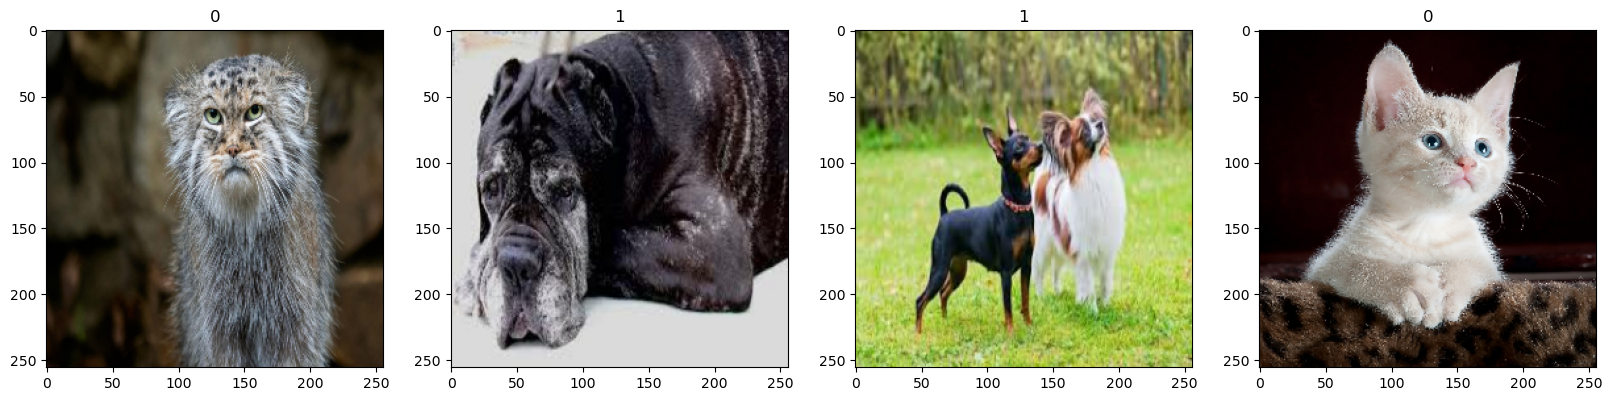

In [36]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### 0 = Cats
### 1 = Dogs

In [37]:
batch[0].min()

0.0

In [38]:
batch[0].max()

255.0

In [39]:
scaled = batch[0]/255

In [40]:
scaled.min()

0.0

In [41]:
scaled.max()

1.0

# 2. Preprocess Data

## 2.1 Scale Data

In [42]:
data = data.map(lambda x, y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [43]:
scaled_iterator = data.as_numpy_iterator()

In [44]:
scaled_batch = scaled_iterator.next()

In [45]:
scaled_batch[0].min()

0.0

In [46]:
scaled_batch[0].max()

1.0

## 2.2 Split Data

In [47]:
len(data)

4

In [48]:
train_size = int(len(data)*.5)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [49]:
train_size

2

In [50]:
val_size

1

In [51]:
test_size

1

In [52]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [53]:
len(train) + len(val) + len(test)

4

# 3. Deep Model

## 3.1 Build a Deep Learning Model

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dense, Flatten

In [56]:
model = Sequential()

In [58]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [59]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 16)        2

## 3.2 Train

In [61]:
logdir = 'Logs'

In [62]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [64]:
hist = model.fit(train, epochs = 40, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/40
2/2 [==============================] - 8s 4s/step - loss: 0.5786 - accuracy: 0.7031 - val_loss: 0.5151 - val_accuracy: 0.7188
Epoch 2/40
2/2 [==============================] - 7s 3s/step - loss: 0.5512 - accuracy: 0.6719 - val_loss: 0.4973 - val_accuracy: 0.7500
Epoch 3/40
2/2 [==============================] - 7s 3s/step - loss: 0.5090 - accuracy: 0.7812 - val_loss: 0.4621 - val_accuracy: 0.8438
Epoch 4/40
2/2 [==============================] - 7s 4s/step - loss: 0.4744 - accuracy: 0.7969 - val_loss: 0.4788 - val_accuracy: 0.7188
Epoch 5/40
2/2 [==============================] - 7s 4s/step - loss: 0.5429 - accuracy: 0.7188 - val_loss: 0.4063 - val_accuracy: 0.8438
Epoch 6/40
2/2 [==============================] - 9s 4s/step - loss: 0.3707 - accuracy: 0.8906 - val_loss: 0.4221 - val_accuracy: 0.8125
Epoch 7/40
2/2 [==============================] - 7s 4s/step - loss: 0.4230 - accuracy: 0.7969 - val_loss: 0.3655 - val_accuracy: 0.8438
Epoch 8/40
2/2 [=========================

In [65]:
hist

## 3.3 Plot Performance

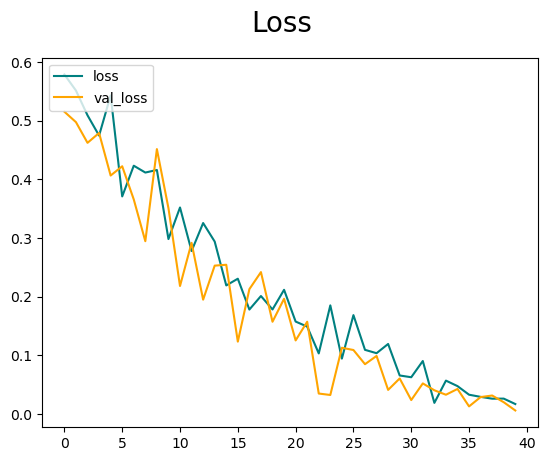

In [67]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

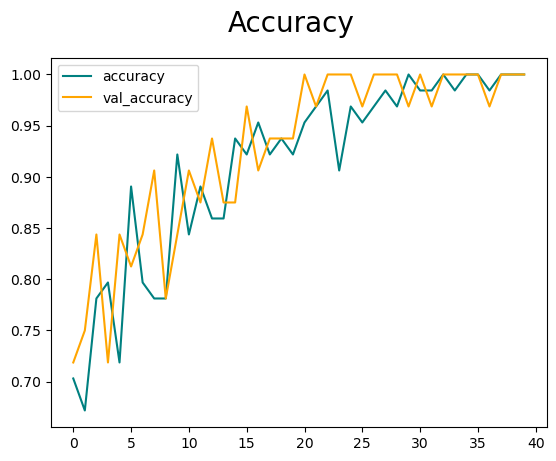

In [68]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

# 4. Evaluate Performance

## 4.1 Evaluate

In [69]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [70]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [72]:
for scaled_batch in test.as_numpy_iterator():
    X, y = scaled_batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 488ms/step


In [73]:
print("Precision: ", pre.result().numpy())
print("Recall: ", re.result().numpy())
print("Accuracy: ", acc.result().numpy())

Precision:  1.0
Recall:  1.0
Accuracy:  1.0


## 4.2 Test

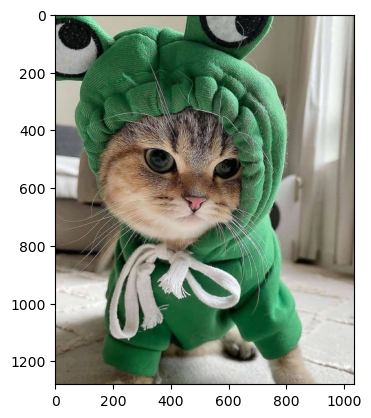

In [99]:
img = cv2.imread('cattest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

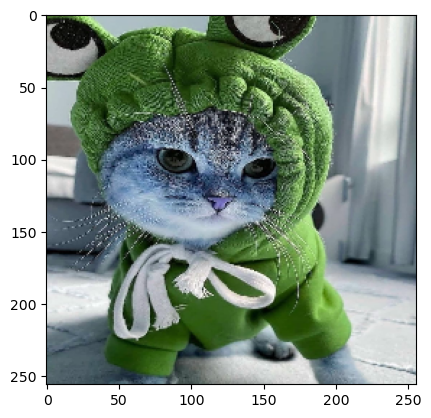

In [100]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [101]:
resize.shape

TensorShape([256, 256, 3])

In [102]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [103]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 289ms/step


In [104]:
yhat

array([[0.00037825]], dtype=float32)

In [105]:
if yhat > 0.5:
    print('Predicted class is dog')
else:
    print('Predicted class is cat')

Predicted class is cat


# 5. Save the Model

## 5.1 Save the Model

In [106]:
from tensorflow.keras.models import load_model

In [107]:
model.save(os.path.join('Models', 'dogcatmodel.h5'))

In [108]:
new_model = load_model(os.path.join('Models', 'dogcatmodel.h5'))

In [109]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 160ms/step


In [110]:
if yhatnew > 0.5:
    print('Predicted class is dog')
else:
    print('Predicted class is cat')

Predicted class is cat
